# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="DATASCI-W261:-Machine-Learning-at-Scale-1" href="#DATASCI-W261:-Machine-Learning-at-Scale"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATASCI W261: Machine Learning at Scale</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Shortest-Path-Dijkstra's-algorithm-11" href="#Shortest-Path-Dijkstra's-algorithm"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Shortest Path-Dijkstra's algorithm</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Undirect-unweighted-Graph-12" href="#Undirect-unweighted-Graph"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Undirect unweighted Graph</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Undirect-weighted-Graph-13" href="#Undirect-weighted-Graph"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Undirect weighted Graph</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Direct-unweighted-Graph-14" href="#Direct-unweighted-Graph"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Direct unweighted Graph</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Direct-weighted-Graph-15" href="#Direct-weighted-Graph"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Direct weighted Graph</a></div><div class="lev1 toc-item"><a data-toc-modified-id="sanity-checks-with-networkx-2" href="#sanity-checks-with-networkx"><span class="toc-item-num">2&nbsp;&nbsp;</span>sanity checks with networkx</a></div>

# DATASCI W261: Machine Learning at Scale

## Shortest Path-Dijkstra's algorithm

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}
 
    def add_node(self, value):
        self.nodes.add(value)
 
    def add_edge(self, node1, node2, distance = 1,direct = False):
        self.edges[node1].append(node2)
        self.distances[(node1, node2)] = distance
        if not direct:
            self.edges[node2].append(node1)
            self.distances[(node2, node1)] = distance
 
 
def dijsktra(graph, initial):
    visited = {initial: 0}
    nodes = set(graph.nodes)
    while nodes:
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node
        if min_node is None:
            break
        nodes.remove(min_node)
        current_weight = visited[min_node]
        for neighbour in graph.edges[min_node]:
            try:
                weight = current_weight + graph.distances[(min_node, neighbour)]
            except:
                continue
            if neighbour not in visited or weight < visited[neighbour]:
                visited[neighbour] = weight
    return visited

## Undirect unweighted Graph

{'A': 0, 'C': 1, 'B': 1, 'E': 2, 'D': 2, 'F': 2}


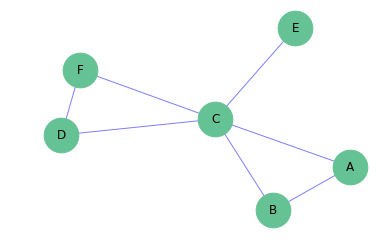

In [3]:
g = Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('F', 'C')]
for node in nodes:
    g.add_node(node)
for edge in edges:
    g.add_edge(*edge)
print dijsktra(g, 'A')

####### Draw the graph #########
G=nx.Graph()

for node in nodes:
  G.add_node(node)
  for edge in edges:
    G.add_edge(edge[0],edge[1])

esmall=[(u,v) for (u,v,d) in G.edges(data=True)]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1200,node_color="#65c294")
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')

plt.axis('off')
plt.savefig("unweighted_graph.png") # save as png
plt.show() # display


## Undirect weighted Graph

{'A': 0, 'C': 3, 'B': 1, 'E': 6, 'D': 7, 'F': 6}


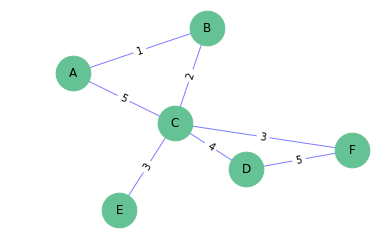

In [4]:
g = Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B', 1), ('A', 'C', 5), ('B', 'C', 2), ('C', 'D', 4), ('C', 'E', 3), ('D', 'F', 5), ('F', 'C', 3)]
for node in nodes:
    g.add_node(node)
for edge in edges:
    g.add_edge(*edge)

print dijsktra(g, 'A')
    
####### networkx ########

G=nx.Graph()

for node in nodes:
  G.add_node(node)
for edge in edges:
  G.add_edge(edge[0],edge[1],weight=edge[2])

esmall=[(u,v) for (u,v,d) in G.edges(data=True)]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1200,node_color="#65c294")
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display



## Direct unweighted Graph

{'A': 0, 'C': 1, 'B': 1, 'E': 2, 'D': 2, 'F': 3}


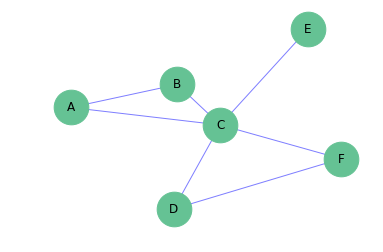

In [5]:
g = Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('F', 'C')]
for node in nodes:
    g.add_node(node)
for edge in edges:
    g.add_edge(*edge, direct = True)

print dijsktra(g, 'A')
G=nx.DiGraph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

esmall=[(u,v) for (u,v,d) in G.edges(data=True)]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1200,node_color="#65c294")
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

## Direct weighted Graph

{'A': 0, 'C': 3, 'B': 1, 'E': 6, 'D': 7, 'F': 12}


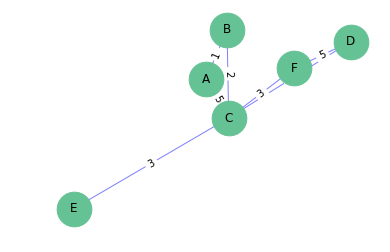

In [7]:
g = Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B', 1), ('A', 'C', 5), ('B', 'C', 2), ('C', 'D', 4), ('C', 'E', 3), ('D', 'F', 5), ('F', 'C', 3)]
for node in nodes:
    g.add_node(node)
for edge in edges:
    g.add_edge(*edge, direct = True)

print dijsktra(g, 'A')


G=nx.DiGraph()

for node in nodes:
  G.add_node(node)
for edge in edges:
  G.add_edge(edge[0],edge[1],weight=edge[2])
  
esmall=[(u,v) for (u,v,d) in G.edges(data=True)]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=1200,node_color="#65c294")
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.axis('off')

plt.savefig("weighted_graph.png") # save as png
plt.show() # display

# sanity checks with networkx

In [8]:
source = 'A'
target = 'F'

d_path=nx.dijkstra_path(G,source,target)
# weight='weight' <- default. name of the property in the edges

s_path = nx.all_shortest_paths(G,source,target,weight='weight') # name of the property in the edges

print [p for p in d_path]

print [p for p in s_path]

print nx.single_source_dijkstra_path_length(G,source) # Compute the shortest path length between source and all other reachable nodes for a weighted graph.

['A', 'B', 'C', 'D', 'F']
[['A', 'B', 'C', 'D', 'F']]
{'A': 0, 'C': 3, 'B': 1, 'E': 6, 'D': 7, 'F': 12}


https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.shortest_paths.html?highlight=dijkstra_path